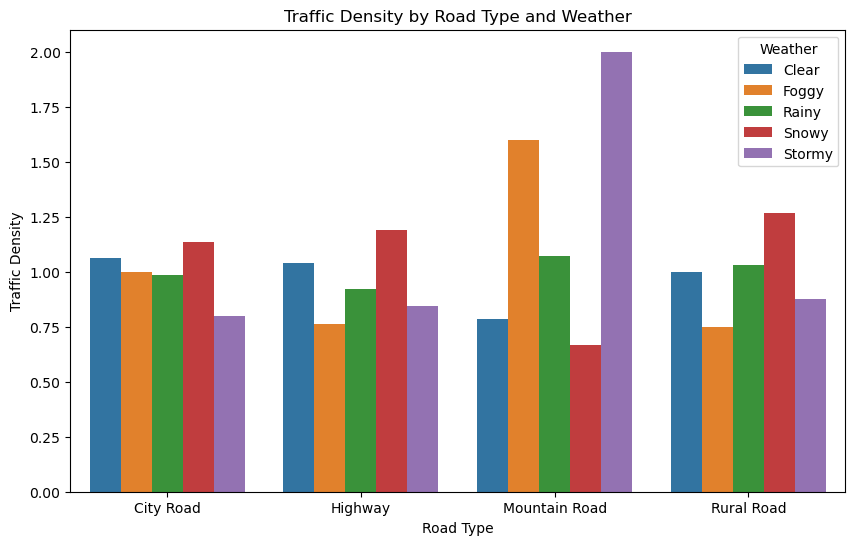

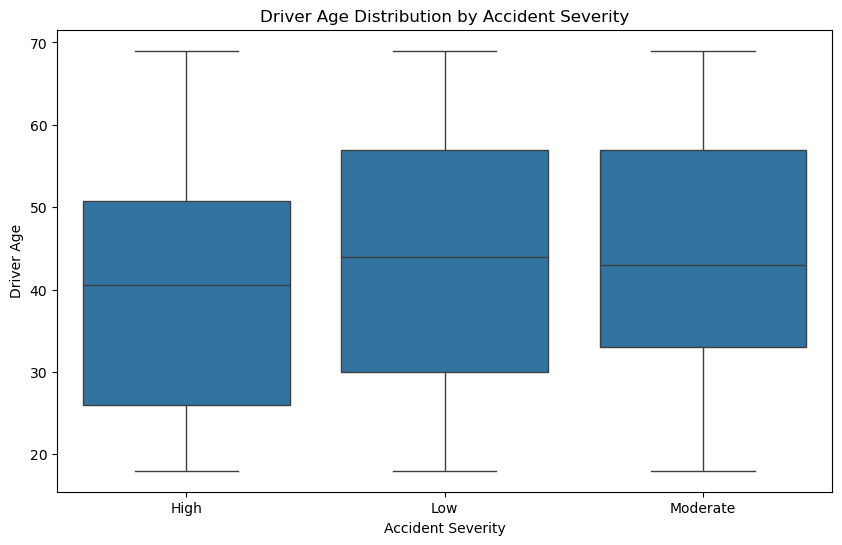

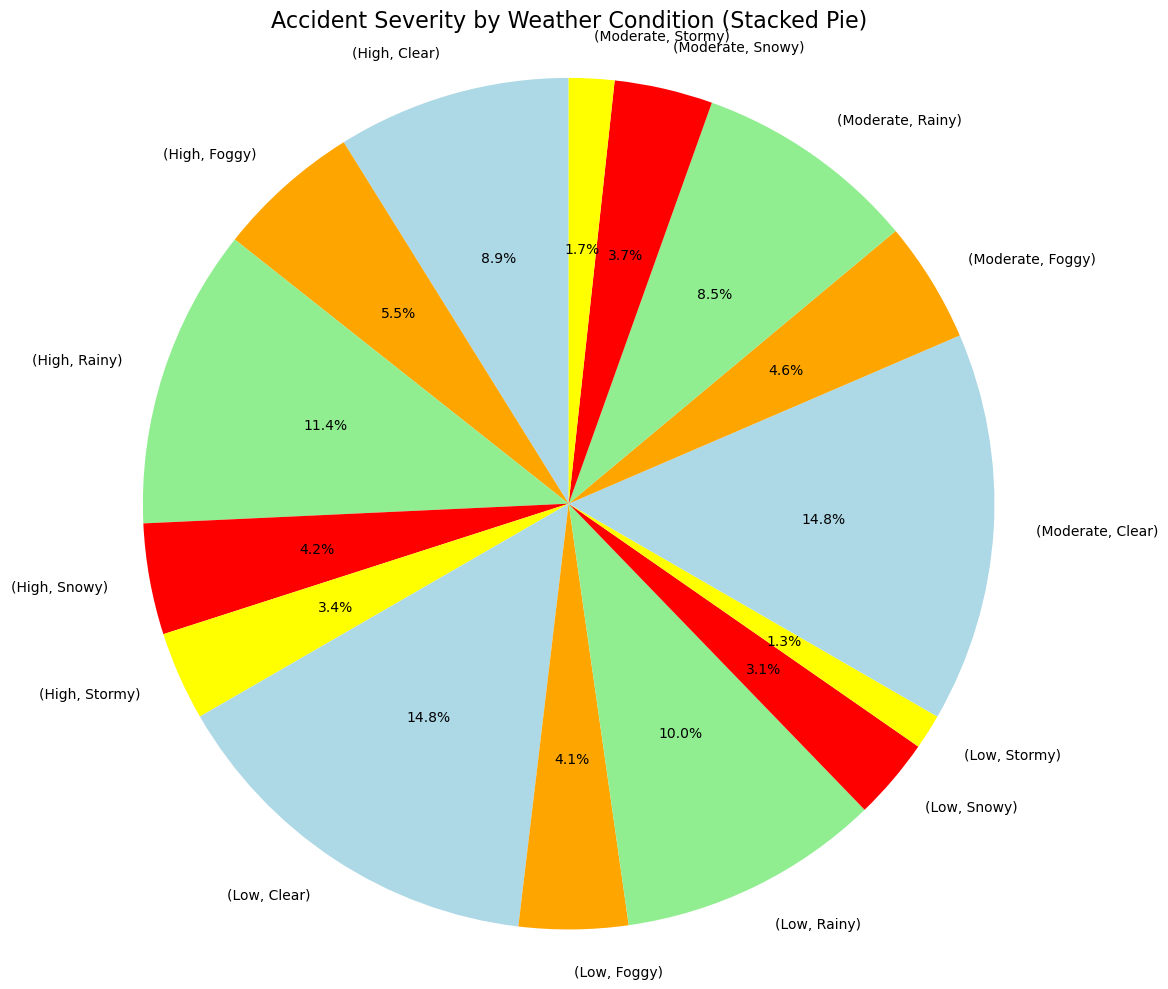

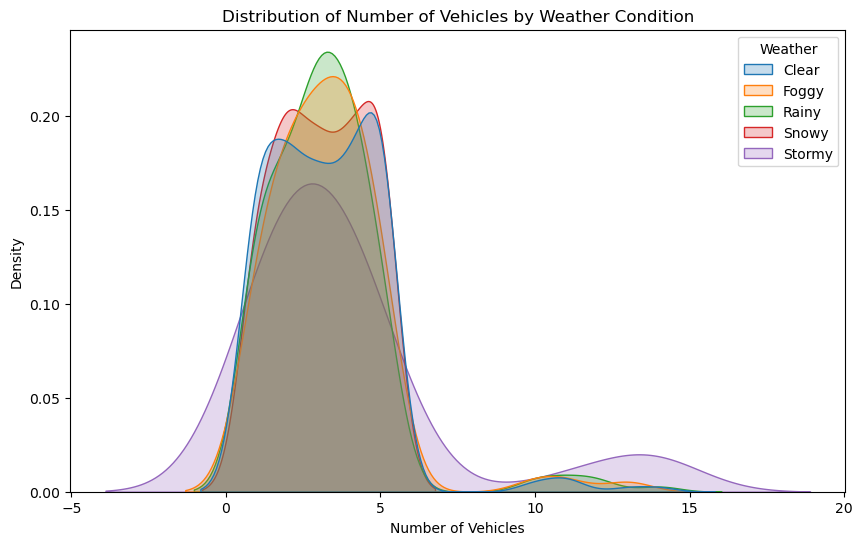

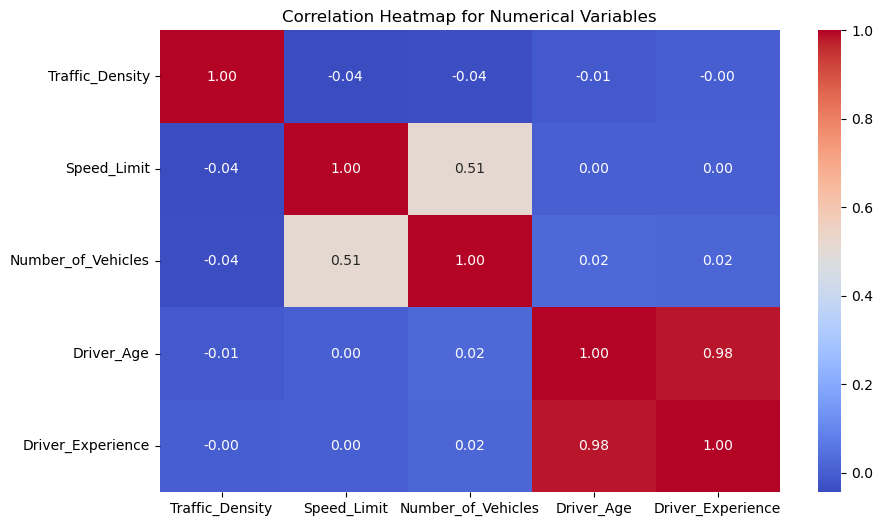


Summary Statistics (Mean, Std, Min, Max) for Numerical Variables:
      Traffic_Density  Speed_Limit  Number_of_Vehicles  Driver_Age  \
mean             1.00        71.05                3.29       43.26   
std              0.76        32.05                2.02       15.13   
min              0.00        30.00                1.00       18.00   
max              2.00       213.00               14.00       69.00   

      Driver_Experience  
mean              38.98  
std               15.27  
min                9.00  
max               69.00  

Summary Statistics (Median, 25th Percentile, 75th Percentile) for Numerical Variables:
                 Traffic_Density  Speed_Limit  Number_of_Vehicles  Driver_Age  \
Median                       1.0         60.0                 3.0        43.0   
25th Percentile              0.0         50.0                 2.0        30.0   
75th Percentile              2.0         80.0                 4.0        56.0   

                 Driver_Experience  
Me

In [3]:
#Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def load_data(file_path):
    """
    Load the dataset from the specified CSV file.

    Args:
        file_path (str): The path to the CSV file containing the dataset.

    Returns:
        data : The loaded DataFrame containing the data.
    """
    data = pd.read_csv(file_path)
    return data


def clean_data(data):
    """
    Clean the dataset by filling missing values and converting columns to appropriate types.

    Args:
        data (pd.DataFrame): The raw DataFrame to be cleaned.

    Returns:
        data : The cleaned DataFrame.
    """
    # Fill missing values in Traffic_Density with the median value
    data['Traffic_Density'] = data['Traffic_Density'].fillna(data['Traffic_Density'].median())

    # Fill missing values in Accident with 0 (indicating no accident)
    data['Accident'] = data['Accident'].fillna(0).astype(int)

    # Convert categorical columns to pandas categorical types for performance
    categorical_columns = ['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity', 
                           'Road_Condition', 'Road_Light_Condition', 'Vehicle_Type']
    
    for col in categorical_columns:
        data[col] = pd.Categorical(data[col])

    return data


def plot_traffic_density(data):
    """
    Plot a bar plot of Traffic Density by Road Type and Weather conditions.

    Args:
        data : The cleaned DataFrame.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='Road_Type', y='Traffic_Density', hue='Weather', errorbar=None)
    plt.title('Traffic Density by Road Type and Weather')
    plt.xlabel('Road Type')
    plt.ylabel('Traffic Density')
    plt.legend(title='Weather')
    plt.show()


def plot_driver_age_vs_accident_severity(data):
    """
    Plot a boxplot of Driver Age vs. Accident Severity.

    Args:
        data : The cleaned DataFrame.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='Accident_Severity', y='Driver_Age')
    plt.title('Driver Age Distribution by Accident Severity')
    plt.xlabel('Accident Severity')
    plt.ylabel('Driver Age')
    plt.show()


def plot_accident_severity_by_weather(data):
    """
    Plot a pie chart for Accident Severity by Weather condition.

    Args:
        data : The cleaned DataFrame.
    """
    # Create a cross-tabulation of Accident Severity and Weather
    accident_weather_counts = pd.crosstab(data['Accident_Severity'], data['Weather'])

    # Normalize the values (percentage distribution) across each row (each accident severity category)
    accident_weather_counts_percentage = accident_weather_counts.div(accident_weather_counts.sum(axis=1), axis=0)

    # Plot a pie chart for Accident Severity by Weather condition
    plt.figure(figsize=(12, 10))  # Increase figure size for better clarity

    # We want a single pie chart that shows the distribution across all categories
    # Flatten the values of the DataFrame to get the labels and values for the pie chart
    pie_data = accident_weather_counts_percentage.stack()

    # Plot the pie chart
    pie_plot = pie_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False, figsize=(12, 10),
                             colors=['lightblue', 'orange', 'lightgreen', 'red', 'yellow'],
                             labeldistance=1.1, fontsize=10)

    # Rotate the pie chart labels
    for label in pie_plot.get_xticklabels():
        label.set_rotation(45)

    # Set the title
    plt.title('Accident Severity by Weather Condition (Stacked Pie)', fontsize=16)

    # Equal aspect ratio ensures that pie chart is circular.
    plt.axis('equal')

    # Adjust layout to prevent label clipping
    plt.tight_layout()

    # Show the plot
    plt.show()


def plot_vehicle_distribution_by_weather(data):
    """
    Plot a density plot of the distribution of the Number of Vehicles by Weather condition.

    Args:
        data : The cleaned DataFrame.
    """
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data, x='Number_of_Vehicles', hue='Weather', fill=True, common_norm=False)
    plt.title('Distribution of Number of Vehicles by Weather Condition')
    plt.xlabel('Number of Vehicles')
    plt.ylabel('Density')
    plt.show()


def plot_correlation_heatmap(data):
    """
    Plot a correlation heatmap for numerical variables.

    Args:
        data : The cleaned DataFrame.
    """
    numerical_columns = ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']
    correlation_matrix = data[numerical_columns].corr()

    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap for Numerical Variables')
    plt.show()

def compute_summary_stats(data):
    """
    Compute summary statistics (mean, std, min, max) and additional statistics (median, percentiles) 
    for the relevant numerical columns.

    Args:
        data : The cleaned DataFrame.

    Returns:
        tuple: A tuple containing two DataFrames:
            - summary_stats_basic: Basic statistics (mean, std, min, max)
            - summary_stats_additional: Additional statistics (median, 25th, 75th percentiles)
            - categorical_stats: Frequency table for categorical columns
            - traffic_density_weather: Mean traffic density by weather condition
            - accident_weather_road: Number of accidents by weather and road type
    """
    numerical_columns = ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']
    numerical_summary_stats = data[numerical_columns].describe()

    # Table 1: Basic Summary Statistics (Mean, Std, Min, Max)
    summary_stats_basic = numerical_summary_stats.loc[['mean', 'std', 'min', 'max']].round(2)

    # Table 2: Additional Summary Statistics (Median, 25th Percentile, 75th Percentile)
    summary_stats_additional = numerical_summary_stats.loc[['50%', '25%', '75%']].round(2)
    summary_stats_additional = summary_stats_additional.rename(index={'50%': 'Median', '25%': '25th Percentile', '75%': '75th Percentile'})

    # Table 3: Number of Accidents by Weather and Road Type
    accident_weather_road = pd.crosstab(data['Weather'], data['Road_Type'], values=data['Accident'], aggfunc='sum').fillna(0)

    # Save all summary tables as CSV files
    summary_stats_basic.to_csv('summary_stats_basic.csv')
    summary_stats_additional.to_csv('summary_stats_additional.csv')
    accident_weather_road.to_csv('accident_weather_road.csv')

    return summary_stats_basic, summary_stats_additional, accident_weather_road

def main():
    """
    Main function to execute the data processing, analysis, and visualization tasks.
    """
    # Load the data
    file_path = r"D:\VS\Visualisation-DHV\dataset_traffic_accident_prediction1.csv"
    data = load_data(file_path)

    # Clean the data
    data = clean_data(data)

    # Generate visualizations
    plot_traffic_density(data)
    plot_driver_age_vs_accident_severity(data)
    plot_accident_severity_by_weather(data)  
    plot_vehicle_distribution_by_weather(data)
    plot_correlation_heatmap(data)

    # Compute summary statistics
    summary_stats_basic, summary_stats_additional, accident_weather_road = compute_summary_stats(data)


    # Display the summary statistics tables
    print("\nSummary Statistics (Mean, Std, Min, Max) for Numerical Variables:")
    print(summary_stats_basic)

    print("\nSummary Statistics (Median, 25th Percentile, 75th Percentile) for Numerical Variables:")
    print(summary_stats_additional)
    
    # Display the accident_weather_road table
    print("\nAccident Weather Road Table (Number of Accidents by Weather and Road Type):")
    print(accident_weather_road)

# Execute the main function
if __name__ == "__main__":
    main()

